## MÁQUINAS DE SOPORTE VECTORIAL

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics
from sklearn import cross_validation 
from sklearn import grid_search

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

C:\Users\andrea\A\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\andrea\A\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

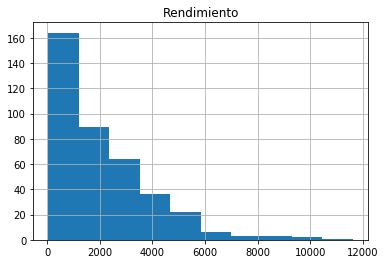

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 10000.0, 'epsilon': 5.623413251903491, 'gamma': 0.01}

In [10]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel rbf

svr = GridSearchCV(SVR(kernel='rbf', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [11]:
print("Los mejores parámetros para el modelo SVM con kernel rbf son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel rbf son:


{'C': 1000.0, 'epsilon': 1.0, 'gamma': 0.1}

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[  60.79366631 2769.63232016  565.48343308 1480.53269929  828.73954599
 1590.17401243 1005.85001742 3102.99125699 3001.24078063 2523.31127079
 1414.92826023 1398.51419633 2766.85280457 2191.76342123 1439.41011523
 1327.5473009  1008.45447392 2120.91593809 2051.58379242  295.3547701
 1717.43246771 1189.04242744 1457.51832506 2198.93532686 1697.70861977
 1891.14216225 2385.08260101  476.67476104 1184.79209509 1210.86933767
 1274.40510373 1777.89301554 2499.9842858  1215.57609108 1712.81682238
 2991.41479688 2407.7695749   114.10657694 2373.48529582  934.24316258
 1968.21876973 1412.12073774 1186.99722572 2667.81431354 1783.01061481
  618.86727523 1006.64091182 2868.43447371 2411.77346868  790.86608441
 1420.66935015  715.13459261 2027.46476091 1603.58432006  205.35435501
  787.79866131 3372.04225987 2623.54016402 1866.90834312  714.95575178
 1750.49811775  650.404763   1757.59496206 1284.75406802  320.79696955
 2862.5009583   674.67306664 1435.42705361 2641.14399972 -460.20519002
  632.6

In [13]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[   18.13370138   158.7093141    533.08672747  1746.26901189
  -1416.64177847 -1349.47476499  1722.5045268  -2278.76032857
   1578.49518165   760.10449208  -408.97786085 -2611.44522866
   2530.62496538]]


In [14]:
#R^2 predicción GLM con kernel lineal

r2_score(y_train,y_lin)

0.16053234972700614

In [15]:
#Modelo SVM con kernel rbf

svr_rbf = SVR(kernel='rbf', C=1e4, epsilon=1e1, gamma=0.01)
y_rbf = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
print(y_rbf)

[  60.79366631 2769.63232016  565.48343308 1480.53269929  828.73954599
 1590.17401243 1005.85001742 3102.99125699 3001.24078063 2523.31127079
 1414.92826023 1398.51419633 2766.85280457 2191.76342123 1439.41011523
 1327.5473009  1008.45447392 2120.91593809 2051.58379242  295.3547701
 1717.43246771 1189.04242744 1457.51832506 2198.93532686 1697.70861977
 1891.14216225 2385.08260101  476.67476104 1184.79209509 1210.86933767
 1274.40510373 1777.89301554 2499.9842858  1215.57609108 1712.81682238
 2991.41479688 2407.7695749   114.10657694 2373.48529582  934.24316258
 1968.21876973 1412.12073774 1186.99722572 2667.81431354 1783.01061481
  618.86727523 1006.64091182 2868.43447371 2411.77346868  790.86608441
 1420.66935015  715.13459261 2027.46476091 1603.58432006  205.35435501
  787.79866131 3372.04225987 2623.54016402 1866.90834312  714.95575178
 1750.49811775  650.404763   1757.59496206 1284.75406802  320.79696955
 2862.5009583   674.67306664 1435.42705361 2641.14399972 -460.20519002
  632.6

In [16]:
#R^2 predicción GLM con kernel rbf

r2_score(y_train,y_lin)

0.16053234972700614

In [17]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1e4,1e6, 1e3]} 
svr = svm.SVR () 
reg = grid_search.GridSearchCV(svr, parameters) 
print(reg.fit(X_train_scaled, y_train)) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10000.0, 1000000.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [18]:
reg.best_params_

{'C': 1000000.0, 'kernel': 'linear'}

### Cross Validation

In [19]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
     
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    #Escalando particiòn de datos
    scaler2= preprocessing.StandardScaler().fit(x2_train)
    X2_train_scaled=scaler.transform(x2_train)
    X2_test_scaled=scaler.transform(x2_test)
 
       
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X2_train_scaled, y2_train)
    y_lin = svr_lin.predict(X2_test_scaled)
    
    R_2.append(r2_score(y2_test,y_lin))
    RMSE.append(np.linalg.norm((y2_test-y_lin),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,y_lin))
 
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.0839
RMSE: 1736.0989
MAE: 915.5412


### Hold Out Validation

In [20]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(100):
    x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.2) #Hacer partición de datos en entrenamiento y prueba

    #Escalando particiòn de datos
    scaler3= preprocessing.StandardScaler().fit(x3_train)
    X3_train_scaled=scaler.transform(x3_train)
    X3_test_scaled=scaler.transform(x3_test)
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X3_train_scaled, y3_train)
    y_lin = svr_lin.predict(X3_test_scaled)
    
    r_2=r2_score(y3_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y3_test-y_lin),2)/np.sqrt(len(y3_test)))
    MAE.append(median_absolute_error(y3_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y3_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.0836
RMSE: 1797.9413
MAE: 924.7951


In [21]:
pd.DataFrame(RMSE)

,0
0,1905.265917
1,1993.442647
2,1558.196750
3,1752.414777
4,2209.201143
...,...
95,1338.650290
96,1863.451977
97,1645.010019
98,1889.358340


In [22]:
df_RMSE = pd.DataFrame(RMSE)
df_RMSE.to_csv('RMSE_SVM_todas.csv', header=False, index=False)